# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* _Дискретный сигнал:_ 

$x_0, x_1, x_2, ..., x_{N-1}$, получается при дискретизации аналогового сигнала $s(t)$ 

Будем считать, что отсчеты $x_k, k = 0,1,2,3, ..., N-1$ дискретного
сигнала получены в результате равномерной
дискретизации сигнала $s(t)$  с шагом дискретизации 1: 

$x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если 

$t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1$, 
то рассматриваем 

$\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате: 

$\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

* _Спектр дискретного сигнала:_

$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$

* _Дискретное преобразование Фурье:_

Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: 

$X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

* _Формула численного дифференцирования для средней точки:_

$ y_n = \frac {s_{n+1}-s_{n-1}} {2h} $

* _Формула прямоугольников:_

$y_{n+1} = y_n + s_{n+1/2}$

* _Формула трапеций:_

$ y_{n+1}  = y_n + \frac 1 2(s_n + s_{n+1}) $


* _Формула Симпсона:_

$ y_{n+1} = y_{n-1} + \frac 1 3(s_{n-1} + 4s_n + s_{n+1}) $



## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1256]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Пункт 1.

Формирование аналогового сигнала, который далее будет дискретизирован:

$s(t) = \displaystyle\sum_{k} A_k \cdot cos(\omega_kt+\varphi_k)$

$A_k$ определяется случайным образом из диапазона целых чисел от 1 до 11. 

$\varphi_k$ является случайной величиной из промежутка от 0 до 0.5. 

$\omega_k$ изменяется в пределах от 0 до $\pi$ с шагом $Δω=0.1\pi$. 



In [1257]:
# вычисление параметров

A_k = []
omega_k = []
phi_k = []

for i in range(11):
    A_k.append(random.randint(1, 11))
    omega_k.append(i*0.1*math.pi)
    phi_k.append(random.uniform(0, 0.5))


In [1258]:
def s(t):
    s = 0
    for i in range(11):
        s += A_k[i]*math.cos(omega_k[i]*t + phi_k[i])
    return s/sum(A_k)

def s_analog():
    s_t = []
    for t in np.arange(0, 32, 0.1):
        s_t.append(s(t))
    return s_t

S_a = s_analog()

def s_discrete():
    x_k = []
    for i in np.arange(0, 32, 1):
        x_k.append(S_a[i*10])
    return x_k

S = s_discrete()

### Пункт 2

Визализирование данных.


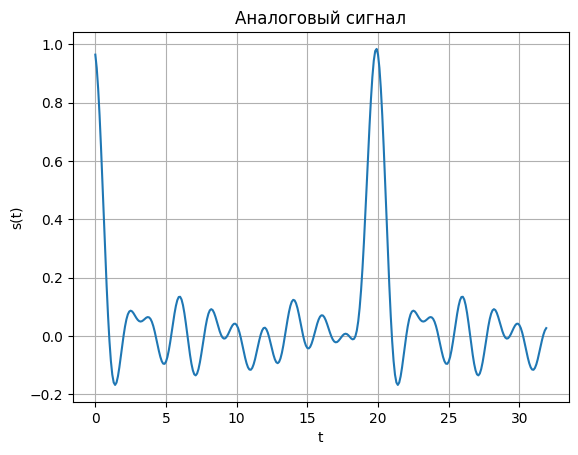

In [1259]:
plt.title('Аналоговый сигнал')
plt.plot(np.arange(0, 32, 0.1), S_a)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()


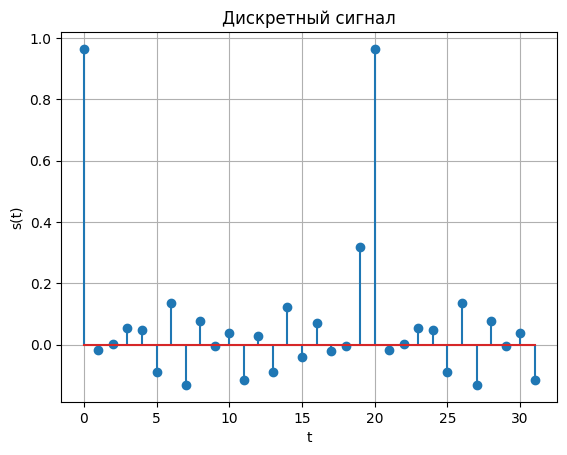

In [1260]:
plt.title('Дискретный сигнал')
plt.stem(np.arange(0, 32, 1), S)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()

### Пункт 3.
С помощью ДПФ находятся дискретные отсчеты спектра дискретного сигнала.

Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N$. 

Результат - дискретная функция с периодом $NT$, где $T$ - период дискретизации:

$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$

Спектр $s(t)$ должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

Поскольку $s(t)$ - периодическая функция, допустимо разложение в ряд Фурье.


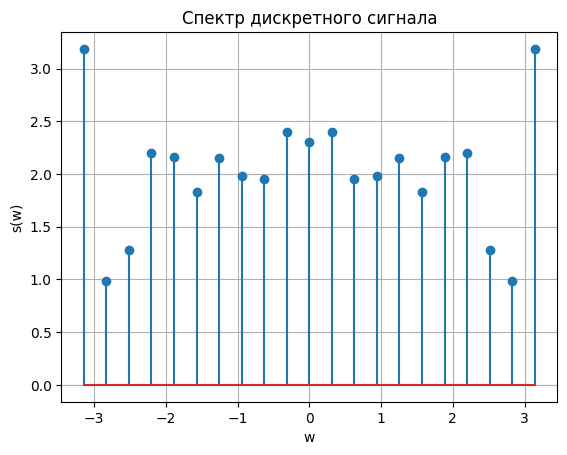

In [1261]:
def DFT(w, s):
    X = 0
    for k in range(len(s)):
        X += s[k]*np.exp(-1j * w * k)
    return X

w = np.arange(-math.pi, 1.1*math.pi, 0.1*math.pi)
f = [np.abs(DFT(i, S)) for i in w]
plt.stem(w, f)
plt.title('Cпектр дискретного сигнала')
plt.xlabel('w')
plt.ylabel('s(w)')
plt.grid()
plt.show()

Спектр симметричен относительно нуля.

### Пункт 4.

Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам: 

* Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

* Формула для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$


In [1262]:
y_5 = np.convolve(S, np.ones(5), 'same') / 5
y_9 = np.convolve(S, np.ones(9), 'same') / 9

### Пункт 5.

Визуализация полученных результатов.

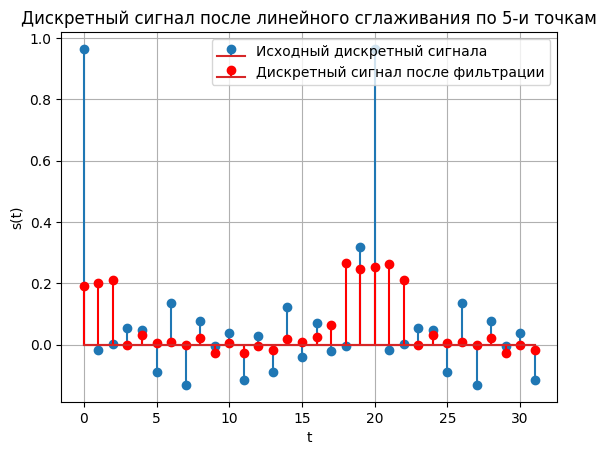

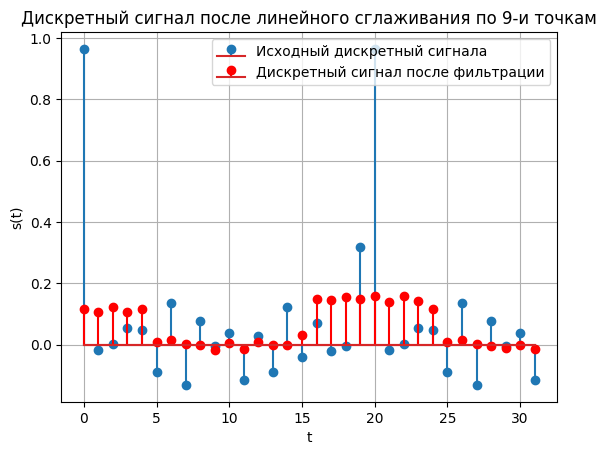

In [1263]:
plt.stem(np.arange(0, 32, 1), S, label="Исходный дискретный сигнала")
plt.stem(np.arange(0, 32, 1), y_5, "red", label="Дискретный сигнал после фильтрации")
plt.title("Дискретный сигнал после линейного сглаживания по 5-и точкам")
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

plt.stem(np.arange(0, 32, 1), S, label="Исходный дискретный сигнала")
plt.stem(np.arange(0, 32, 1), y_9, "red", label="Дискретный сигнал после фильтрации")
plt.title("Дискретный сигнал после линейного сглаживания по 9-и точкам")
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Пункт 6.

$\quad$С помощью дискретного преобразования Фурье (ДПФ) найдены дискретные отсчеты спектров дискретных сигналов после фильтрации:

In [1264]:
f_5 = [np.abs(DFT(i, y_5)) for i in w]
f_9 = [np.abs(DFT(i, y_9)) for i in w]

Визуализация полученных результатов:

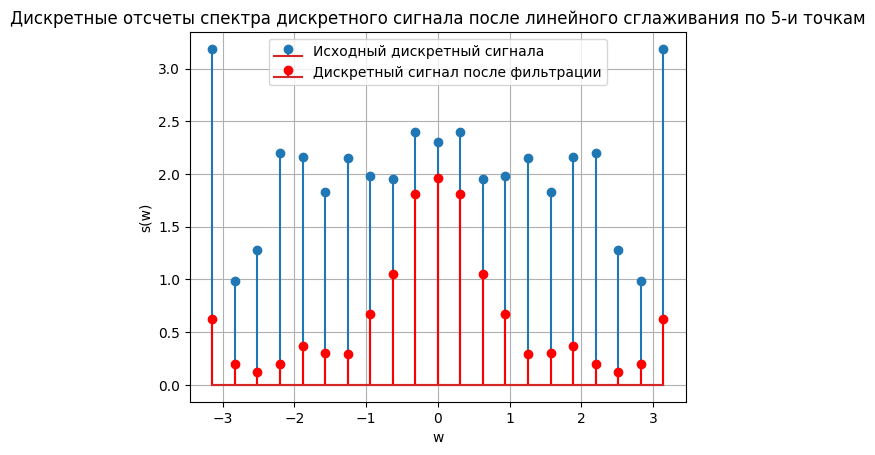

In [1265]:
plt.stem(w, f, label="Исходный дискретный сигнала")
plt.stem(w, f_5, "red", label="Дискретный сигнал после фильтрации")
plt.title('Дискретные отсчеты спектра дискретного сигнала после линейного сглаживания по 5-и точкам')
plt.xlabel('w')
plt.ylabel('s(w)')
plt.grid()
plt.legend()
plt.show()


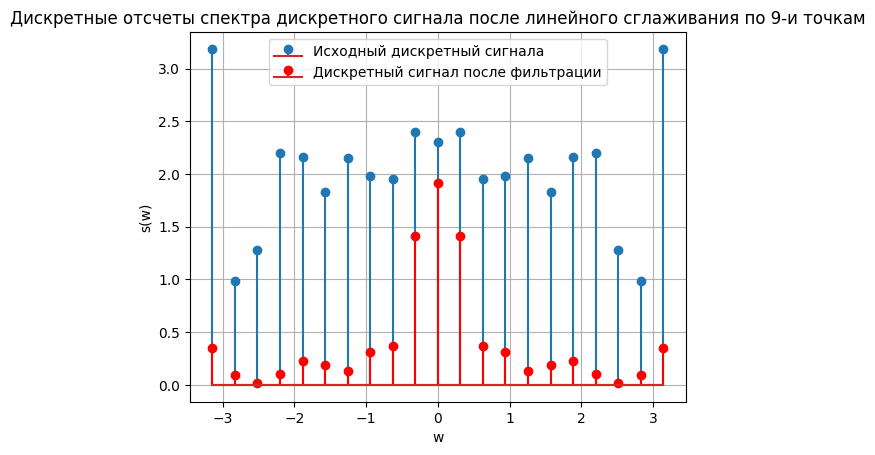

In [1266]:
plt.stem(w, f, label="Исходный дискретный сигнала")
plt.stem(w, f_9, "red", label="Дискретный сигнал после фильтрации")
plt.title('Дискретные отсчеты спектра дискретного сигнала после линейного сглаживания по 9-и точкам')
plt.xlabel('w')
plt.ylabel('s(w)')
plt.grid()
plt.legend()
plt.show()

### Пункт 7.
 
Анализ результатов:

1. Вид графиков спектра дискретного сигнала при сглаживании по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
2. Без ослабления пропускается только сигнал постоянного уровня (нулевой частоты). С увеличением числа точек полоса пропускания становится уже.


### Пункт 8.



#### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Формула для численного дифференцирования 1-го порядка с шагом $h = 1$:

$y_n = \frac12(s_{n+1} - s_{n-1})$

Передаточная функции (частотной характеристики) фильтра:

$H(\omega) = i\sin\omega$

In [1267]:
def s_differentiation():
    y = np.zeros(len(S))
    for i in range(1, len(S)-1):
        y[i] = (S[i+1]-S[i-1])/2
    return y

y_n_a = s_differentiation()


Визуализация полученных результатов:

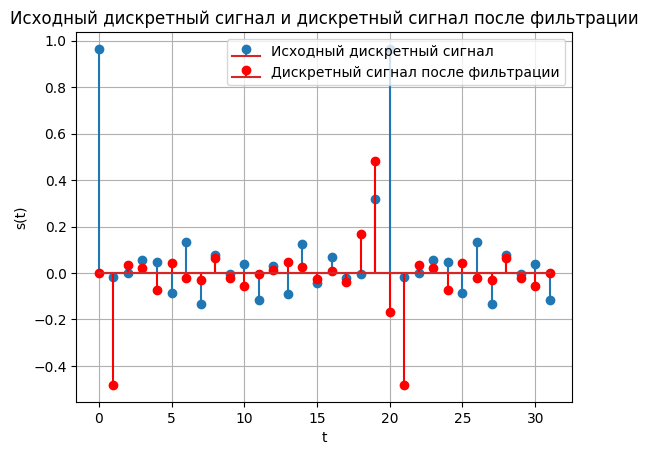

In [1268]:
plt.title('Исходный дискретный сигнал и дискретный сигнал после фильтрации')
plt.stem(np.arange(0, 32, 1), S, label = "Исходный дискретный сигнал")
plt.stem(np.arange(0, 32, 1), y_n_a, "red", label = "Дискретный сигнал после фильтрации")
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.legend()
plt.show()


Дискретные отсчеты спектров дискретных сигналов после фильтрации, найденные с помощью дискретного преобразования Фурье (ДПФ):

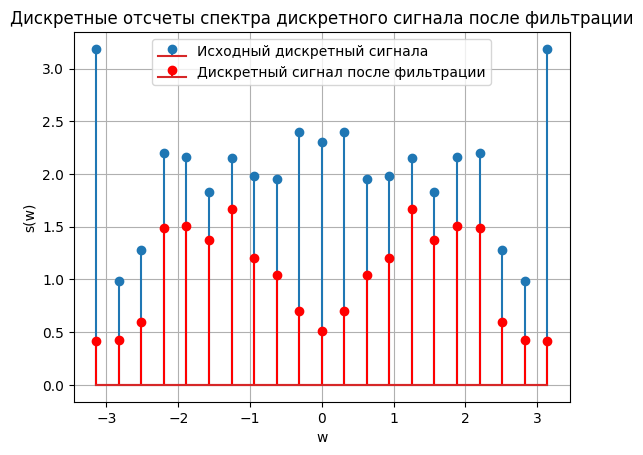

In [1269]:
f_a = [np.abs(DFT(i, y_n_a)) for i in w]

plt.stem(w, f, label="Исходный дискретный сигнала")
plt.stem(w, f_a, "red", label="Дискретный сигнал после фильтрации")
plt.title('Дискретные отсчеты спектра дискретного сигнала после фильтрации')
plt.xlabel('w')
plt.ylabel('s(w)')
plt.grid()
plt.legend()
plt.show()

Анализ результатов:

По графику спектра видно, что средние частоты усиливаются, при этом низкие и высокие частоты сглаживаются, что соответствует значениям передаточной функции, так как она имеет форму синусоиды.

#### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

* Формула прямоугольников:

    $y_{n+1} = y_n + s_{n+1/2}$

    Передаточная функции (частотной характеристики) фильтра:

    $H(\omega) = \frac 1 {2isin(\frac \omega 2)}$

* Формула трапеций:

    $ y_{n+1}  = y_n + \frac 1 2(s_n + s_{n+1}) $

    Передаточная функция:

    $ H(\omega) = \frac {cos(\frac \omega 2)} {2isin(\frac \omega 2)}$

* Формула Симпсона:

    $ y_{n+1} = y_{n-1} + \frac 1 3(s_{n-1} + 4s_n + s_{n+1}) $

    Передаточная функция:

    $ H(\omega) = \frac {cos(\omega) + 2} {3isin(\omega)}$ 

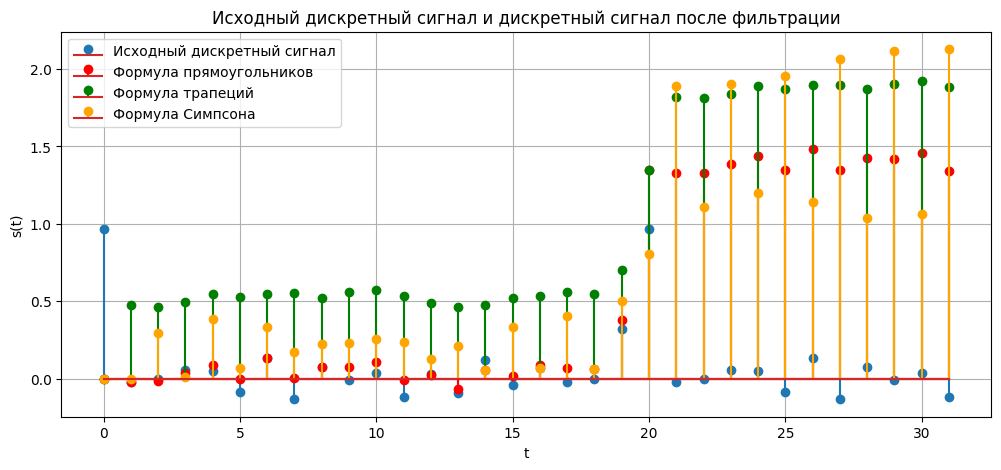

In [1270]:
def s_rectangles(s):
    y = np.zeros(len(s))
    for i in range(1, len(s)):
        y[i] = y[i-1] + s[i]
    return y

def s_trapezoid(s):
    y = np.zeros(len(s))
    for i in range(1, len(s)):
        y[i] = y[i-1] + 0.5 * (s[i-1] + s[i])
    return y

def s_Simpson(s):
    y = np.zeros(len(s))
    for i in range(2, len(s)):
        y[i] = y[i-2] + (s[i-2] + 4*s[i-1] + s[i]) / 3
    return y


y_1 = s_rectangles(S)
y_2 = s_trapezoid(S)
y_3 = s_Simpson(S)

plt.figure(figsize=(12, 5))
plt.title('Исходный дискретный сигнал и дискретный сигнал после фильтрации')
plt.stem(np.arange(0, 32, 1), S, label = "Исходный дискретный сигнал")
plt.stem(np.arange(0, 32, 1), y_1, "red", label = "Формула прямоугольников")
plt.stem(np.arange(0, 32, 1), y_2, "green", label = "Формула трапеций")
plt.stem(np.arange(0, 32, 1), y_3, "orange", label = "Формула Симпсона")
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.legend()
plt.show()

Дискретные отсчеты спектров дискретных сигналов после фильтрации, найденные с помощью дискретного преобразования Фурье (ДПФ):

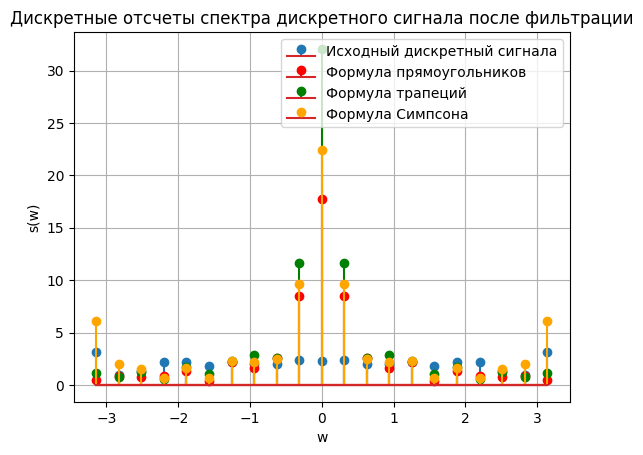

In [1271]:
f_1 = [np.abs(DFT(i, y_1)) for i in w]
f_2 = [np.abs(DFT(i, y_2)) for i in w]
f_3 = [np.abs(DFT(i, y_3)) for i in w]

plt.stem(w, f, label="Исходный дискретный сигнала")
plt.stem(w, f_1, "red", label = "Формула прямоугольников")
plt.stem(w, f_2, "green", label = "Формула трапеций")
plt.stem(w, f_3, "orange", label = "Формула Симпсона")
plt.title('Дискретные отсчеты спектра дискретного сигнала после фильтрации')
plt.xlabel('w')
plt.ylabel('s(w)')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

Анализ результатов:

1. При значении частоты, близком к нулю, все формулы усиливают сигнал. 
2. Использование формулы трапеций усиливает низкие частоты больше других формул, при этом подавляет высокие частоты.
3. Использование формулы Симпсона, наоборот, усиливает высокие частоты.
4. В диапозоне средних частот все формулы подавляют сигнал.

Данные результаты соответствуют значениям передаточных функций.

## Выводы

В ходе выполнения данной лабораторной работы был сгенерирован дискретный сигнал. К нему были применены линейное сглаживание по 5-ти и 9-ти точкам и фильтры, соответствующие численному дифференцированию 1-го порядка и численному интегрированию. Кроме этого, с помощью ДПФ были найдены дискретные отсчеты спектра для дискретного сигнала после его фильтраци и для исходного дискретного сигнала. Все полученные результаты фильтрации сигнала были визуализированы с помощью графиков, проанализированы и сопоставлены с исходным сигналом. Было выяснено, что спектр дискретного сигнала симметричен относительно 0, а спектры дискретного сигнала после его фильтрации соответствуют значениям передаточных функций фильтра.